## @Mohammed Ombadi (ombadi@lbl.gov) _ Nature 2023, Ombadi et al. "A warming-induced reduction in snow fraction amplifies rainfall extremes"

### This notebook contains code for the analysis of elevation-dependent amplification in rainfall extremes which composes the main analysis presented in the paper.

## Import Libraries

In [1]:
# Basic libraries
import os
import glob
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Other
import netCDF4 as nc
 
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

## Fig 1 and related figures: Elevation-dependent amplification of rainfall extremes

### Figure 1a, 1b and Extended Data Fig 1a: ERA5 Elevation-dependent amplification

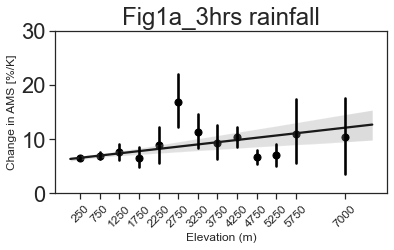

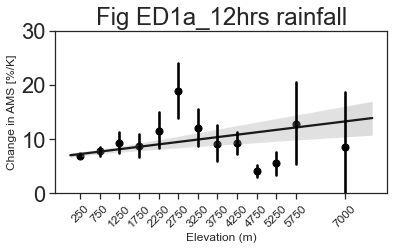

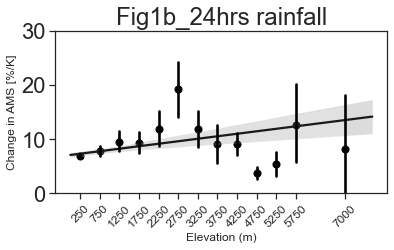

In [2]:
# Import elevation data 
d = nc.Dataset('./Raw data/Elevation_1deg.nc')
elev = d['data'][:]
elev = np.transpose(elev)[:70, :] # Transpose and extract (90N-20N) data; size of elev = (70*360)
elev[elev<0] = np.nan

          # --------------------------------------------------------------------------------------- #

# Import percentage change in rainfall extremes for ERA5 data
d = nc.Dataset('./Results/Change-rainfall-extremes/ERA5_percentage_change_rainfall_extremes_resampled.nc')
era5 = d['data'][:]
era5 = np.transpose(era5, (2,1,0)) # Transpose to (lat*lon*duration); Rainfall duration is 3, 12 and 24 hrs 

         # --------------------------------------------------------------------------------------- #

titles = ['Fig1a_3hrs rainfall', 'Fig ED1a_12hrs rainfall', 'Fig1b_24hrs rainfall']
# Iterate over durations (3 hrs, 12 hrs and 24 hrs)
for i in range(era5.shape[2]):
    
    # Create a dataframe (size = number of grid cells * 2 columns)
    df = pd.DataFrame(index= list(range(elev.shape[0]*elev.shape[1])), 
                                        columns= ['elevation', 'era5_change'])
    df['elevation'] = elev.flatten()
    
    # Changes in ERA5 normalized by degree of warming (= 0.8064 degC) 
    df['era5_change'] = ((era5[:,:,i].flatten())/0.8064) 

    df = df.dropna() #remove NAs
    
    # Add a new column with elevation categories
    df['elev_category'] = np.nan
    elev_class = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 8000]
    for j in range(len(elev_class)-1):
        idx = (df['elevation'] >= elev_class[j]) & (df['elevation'] < elev_class[j+1])
        df['elev_category'][idx] = (elev_class[j] + elev_class[j+1])/2


    # plot elevation-dependent changes 
    
    figure = plt.figure(figsize=(6,4))
    sns.set(font_scale= 2, style= "ticks")
    
    plot = sns.regplot(data=df, x='elevation', y='era5_change', color= 'black', scatter= False, 
                       line_kws={"color": "k"}, x_estimator=np.mean, x_ci = 90, order= 1, ci= 95)
    
    plot = sns.regplot(data=df, x='elev_category', y='era5_change', color= 'black', scatter= True, 
                       line_kws={"color": "white", 'alpha': 0}, x_estimator=np.mean, x_ci = 90, order= 1, ci=95)
    
    plt.ylim([0, 30])
    plot.set_xlabel('Elevation (m)',fontsize=12)
    plot.set_ylabel('Change in AMS [%/K]',fontsize=12)
    plot.set_xticks([250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750, 5250, 5750, 7000])
    plot.set_xticklabels(plot.get_xticks(), rotation = 45, fontsize= 12)
    plt.title(titles[i])
    plt.tight_layout()
    

### Figure 1c, 1d and Extended Data Fig 1b: CMIP6 Elevation-dependent amplification

In [3]:
# Import elevation data 
d = nc.Dataset('./Raw data/Elevation_1deg.nc')
elev = d['data'][:]
elev = np.transpose(elev)[:70, :] # Transpose and extract (90N-20N) data; size of elev = (70*360)
elev[elev<0] = np.nan

          # --------------------------------------------------------------------------------------- #

# Import percentage change in rainfall extremes for CMIP6 models 
#files = glob.glob('./Results/Change-rainfall-extremes/*.nc')
files = [os.path.basename(x) for x in glob.glob('./Results/Change-rainfall-extremes/*.nc')]
files.remove('ERA5_percentage_change_rainfall_extremes_resampled.nc') #Remove ERA5 data


# Pre-allocate a numpy array to store %change values for all models and durations
# size of array = (n*m*3), where n is number of grid cells, m is number of models 
# and 3 is for duration (3,12,24-hrs)

d = nc.Dataset('./Results/Change-rainfall-extremes/' + files[0])
dummy = d['data'][:]
dummy = np.transpose(dummy, (2,1,0))
n = dummy.shape[0]*dummy.shape[1]   #number of grid cells
m = len(files)  #number of models
change_rainfall = np.zeros((n, m, 3))
models = [] #list of model names

# Fill the array
for i in range(len(files)):
    
    models.append(files[i].split('_percentage')[0])
    d = nc.Dataset('./Results/Change-rainfall-extremes/' + files[i])
    data = d['data'][:]
    data = np.transpose(data, (2,1,0))
    
    for j in range(data.shape[2]):
        
        change_rainfall[:,i,j] = data[:,:,j].flatten()
        
# Model GFDL has only 24-hours results
change_rainfall[:,0,2] = change_rainfall[:,0,0] #Fill the 24-hour data
change_rainfall[:,0,0] = 0 # Set the 3-hour to zero

/Users/ombadi/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ombadi/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ombadi/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

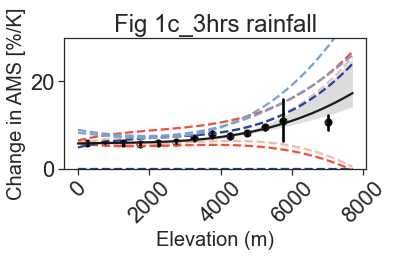

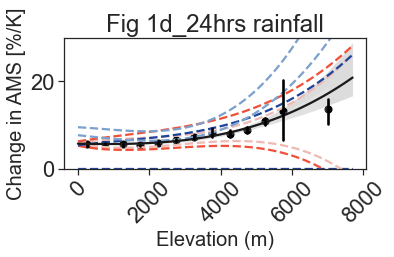

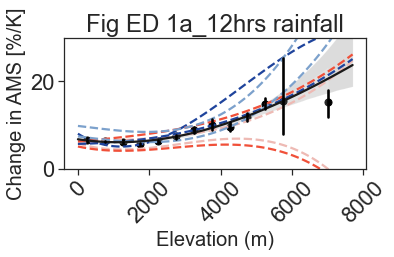

In [4]:
  
          # -----------------------------------Plotting-------------------------------------- #

titles = ['Fig 1c_3hrs rainfall', 'Fig 1d_24hrs rainfall', 'Fig ED 1a_12hrs rainfall']
# Iterate over durations (3 hrs, 12 hrs and 24 hrs)
for i in range(change_rainfall.shape[2]):
    
    # Extract 2d matrix from the 3d-array that correspond to the speific duration
    df = pd.DataFrame(change_rainfall[:,:,i], columns = models)
    #df = df.dropna()
    
    # Divide all %change values by the warming levels correspnding to each model (ED Table 2)
    warming_levels = [3.8572, 3.8638, 4.7808, 5.6268, 6.6448, 4.3571, 5.8841, 4.9356]
    df = df/warming_levels
    df['mean'] = np.mean(df, axis= 1)
    
    # Add elevation 
    df['elevation'] = elev.flatten()
    
    # Add a new column with elevation categories
    df['elev_category'] = np.nan
    elev_class = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 8000]
    for j in range(len(elev_class)-1):
        idx = (df['elevation'] >= elev_class[j]) & (df['elevation'] < elev_class[j+1])
        df['elev_category'][idx] = (elev_class[j] + elev_class[j+1])/2
        
    df = df.dropna() #remove NAs
    
    
    # Set figure properties
    figure = plt.figure(figsize=(6,4))
    sns.set(font_scale= 2, style= "ticks")
    sns.despine()
    
    color= ['#1F449C', '#EEBAB4', '#F05039', '#EEBAB4', '#1F449C', '#F05039', '#7CA1CC', '#7CA1CC', 'black'] 
    lines = ['dashed', 'dashed', 'dashed', 'dashdot', 'dashdot', 'dashdot', 'dashed', 'dashdot', 'solid']
    
    for k in range(len(models)):
        
        x = df['elevation'].values
        x1 = df['elev_category'].values
        y = df.iloc[:,k].values
        
        plot = sns.regplot(x, y, color= color[k], scatter= False, line_kws={"linestyle": lines[i], 'alpha':1},
                          x_estimator=np.mean, x_ci= None, order= 3, ci= None)
        
    # Add a regression line and discrete estimates for the multi-model mean estiamte
    y = df['mean'].values
    plot = sns.regplot(x, y, scatter= False, line_kws={"color": "k"}, x_estimator=np.mean
                         , order= 3)
    plot = sns.regplot(x1, y, color= 'black', scatter= True, line_kws={"color": "white", 'alpha': 0}, 
                           x_estimator=np.mean, x_ci = 90, order= 3)  
    
        
    plot.set_xlabel('Elevation (m)',fontsize=20)
    plot.set_ylabel('Change in AMS [%/K]',fontsize=20)
    plt.ylim([0, 30])
    
    plot.set_xticks([250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750, 5250, 5750, 7000])
    plot.set_xticks([0, 2000, 4000, 6000, 8000])
    plot.set_xticklabels(plot.get_xticks(), rotation = 45)
    
    plt.title(titles[i])
    plt.tight_layout()